In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

wpth = '/glade2/scratch2/psharma/asym058/staging'
M = Movie(param_file='param_asym058', path=wpth, num=0)

In [2]:
tm = 0
dphi = []

d = M.get_fields('bx by ez', tm)

dx = d['xx'][1] - d['xx'][0]
ip0 = len(d['xx'])/4
ip1 = len(d['xx'])*3/4
jp = len(d['xx'])*3/4

time_arr = np.arange(250)

for tm in time_arr:
    d = M.get_fields('bx by ez', tm);
    p = calc_psi(d)
    #dphi.append(sum(p[ip0:ip1, jp])*dx)
    dphi.append(p[ip1,jp] - p[ip0,jp])

dphi = np.array(dphi)
time_arr = time_arr*M.param['dt']*M.param['n_movieout']

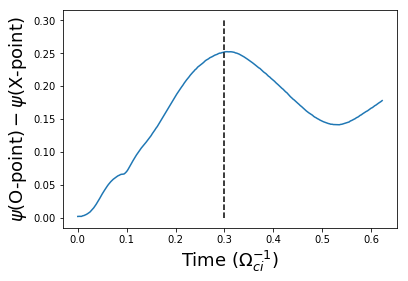

In [3]:
plt.plot(time_arr, dphi)
#plt.plot(time_arr[1:-1], (dphi[2:] - dphi[:-2])/2./(time_arr[1] - time_arr[0]))
plt.xlabel('Time ($\Omega_{ci}^{-1}$)',size=18)
plt.ylabel('$\psi($O-point$) - \psi($X-point$)$',size=18)
plt.plot(np.arange(4)*0. + .3, np.arange(4)/10., 'k--')

### Note that the cyclotron times are normalized to the reconnection field and not to the guide field!

In [4]:
d = M.get_fields('jz', 120)

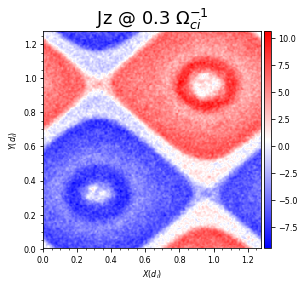

In [5]:
ims(d,'jz',cmap='bwr',cbar=1)
plt.title('Jz @ 0.3 $\Omega_{ci}^{-1}$',size=18)